### Notebook Information
Made by: [@NicoAntonelli](https://github.com/NicoAntonelli/), May 2020


# Pseudorandom Numbers Generator
### Linear Congruential Method

$\
\begin{equation*}
X_n = (A \ X_{n-1} + C) \mod M
\end{equation*}
$

$\
\begin{equation*}
    \begin{cases}
        0 < M \\
        0 < A < M \\
        0 \leq C < M
    \end{cases}
\end{equation*}
$

Where M ("modulus"), A ("mutiplier") and C ("increment") are arbitrary integers, but it is recommended that they be selected in such a way as to give us an apparently uniform distribution and can overcome randomness studies.

If C = 0 this method is called _Multiplicative Congruential Method_, otherwise it is called _Mixed Congruential Method_.

I will use:
- M: The largest 32-bit prime
- A: Large odd 30-bit number
- C: 0 (for multiplicative), and later: A - 42 (for mixed)

We need to use a "seed" X0 for the pseudorandom generator, this number can be calculated througth a chaotic physical phenomena in order to be a "practically" random seed.

I will use any value for now.

$\
\begin{equation*}
    0 \leq X_0 < M
\end{equation*}
$


In [1]:
M = 2**31 - 1
A = 1103515245
C = 0
X0 = 876543210

In [2]:
import numpy as np

def randomGenerator(M, A, C, X0, total):
    x_values = [X0]
    for _ in range (total-1):
        x_values.append((x_values[-1] * A + C) % M)
    x_values = np.array(x_values)
    return x_values

We can generate Rn pseudorandom numbers with Uniform Distribution in a U(0, 1) range with this formula:

$\
\begin{equation*}
    R_n = X_n \ / \ M
\end{equation*}
$


In [3]:
def randomValues(array, M):
    return np.array([x for x in array / M])

### Calculating 50 pseudorandom numbers with Multiplicative Congruential Generator

In [4]:
total = 50
multiplicative_random_values = np.array(randomGenerator(M, A, C, X0, total))
multiplicative_random_values = randomValues(multiplicative_random_values, M)
multiplicative_random_values

array([0.40817224, 0.13836402, 0.74237533, 0.51269918, 0.72118215,
       0.13531026, 0.90950476, 0.04844219, 0.81265623, 0.92106622,
       0.40486338, 0.1206194 , 0.14007495, 0.09061731, 0.34696888,
       0.71414754, 0.72583287, 0.50784245, 0.85233697, 0.4814121 ,
       0.93480036, 0.24325242, 0.72004179, 0.18103795, 0.20516572,
       0.39478872, 0.4748188 , 0.264529  , 0.55936862, 0.0987665 ,
       0.2646074 , 0.64701737, 0.45247242, 0.49919486, 0.42866021,
       0.50038251, 0.79175833, 0.99838293, 0.93722136, 0.44840227,
       0.24325024, 0.05680765, 0.60233568, 0.12943085, 0.85208307,
       0.30308664, 0.26953925, 0.0540869 , 0.70627092, 0.83522974])

Excelent! Time to plot it on a Scattering Graph 

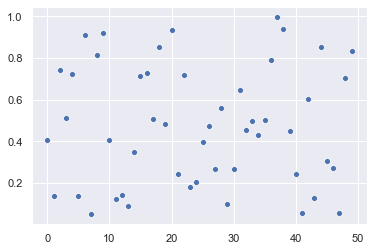

In [5]:
import seaborn as sns
sns.set()

sns.scatterplot(data=multiplicative_random_values)

### Calculating 50 pseudorandom numbers again, buy with Mixed Congruential Generator

In [6]:
C = A-42
mixed_random_values = np.array(randomGenerator(M, A, C, X0, total))
mixed_random_values = randomValues(mixed_random_values, M)
mixed_random_values

array([0.40817224, 0.65222833, 0.45858159, 0.98035704, 0.26674778,
       0.06839263, 0.70446154, 0.37356958, 0.59172244, 0.56911712,
       0.8075098 , 0.15059329, 0.01733389, 0.139531  , 0.20946706,
       0.95772999, 0.59551247, 0.93157735, 0.68402616, 0.05780662,
       0.73605331, 0.38208369, 0.4023153 , 0.89621136, 0.14569146,
       0.87428425, 0.94856306, 0.83939444, 0.10159998, 0.97922062,
       0.79880611, 0.43564944, 0.85865053, 0.15556228, 0.78494043,
       0.93707502, 0.41639388, 0.44365223, 0.42805348, 0.5689333 ,
       0.57129026, 0.7785864 , 0.14765084, 0.68907728, 0.8684091 ,
       0.63884431, 0.30769587, 0.30255849, 0.59624968, 0.10664062])

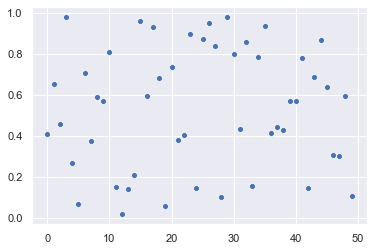

In [7]:
sns.scatterplot(data=mixed_random_values)

## As far we can see, both seems to be quite random and does not follow any pattern.

## That's all for now...